In [1]:
#put imports here
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os as _dir

working_dir = _dir.getcwd()
csv_path = "top10s.csv"
for root, dirs, files in _dir.walk(working_dir):
    if csv_path in files:
        csv_path = (_dir.path.join(root, csv_path))
        
song_df=pd.read_csv(csv_path,encoding="ISO-8859-1")

song_df.drop(song_df.columns[song_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

#Create head
song_df.head()


,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [2]:
#Use shape to show number of rows and columns 
song_df.shape


(603, 14)

In [3]:
#Print Dataframe
song_df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [5]:
#Display columns
song_df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [15]:
#List Tope Genres and counts
song_df["top genre"].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
tropical house                 3
colombian pop                  3
belgian edm                    2
escape room                    2
canadian hip hop               2
brostep                        2
indie pop                      2
detroit hip hop                2
baroque pop                    2
electronic trap                2
candy pop 

In [7]:
#Create dataframe per year amd genre 
years_df=song_df.groupby(["year"])
years_df['top genre'].describe()

,count,unique,top,freq
year,,,,
2010,51,13,dance pop,31
2011,53,9,dance pop,38
2012,35,9,dance pop,15
2013,71,18,dance pop,42
2014,58,18,dance pop,27
2015,95,18,dance pop,52
2016,80,19,dance pop,46
2017,65,18,dance pop,31
2018,64,13,dance pop,38


In [8]:
#Show top aand botto genres
song_df["top genre"]

0           neo mellow
1      detroit hip hop
2            dance pop
3            dance pop
4                  pop
            ...       
598          dance pop
599                pop
600          dance pop
601          dance pop
602         electropop
Name: top genre, Length: 603, dtype: object

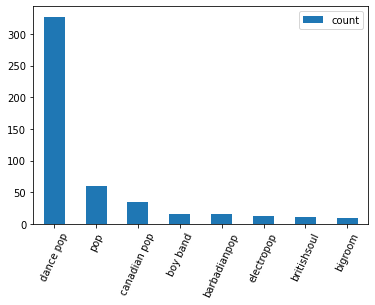

In [10]:
 # Create Bar Graph
count = [327,60,34,15,15,13,11,10]
index = ['dance pop', 'pop', 'canadian pop', 'boy band', 'barbadianpop', 'electropop', 'britishsoul', 'bigroom']

df = pd.DataFrame({'count': count}, index=index)
ax = df.plot.bar(rot=65)

In [11]:
#Measure Correlation Coeffiencent bewteeen Valence and Popularity 
val=years_df['val'].mean()
pop=years_df['pop'].mean()
corr=st.pearsonr(val,pop)

In [12]:
#Print correlation
corr

(-0.13635109494951342, 0.7072156821171067)

The r-value is:-0.136


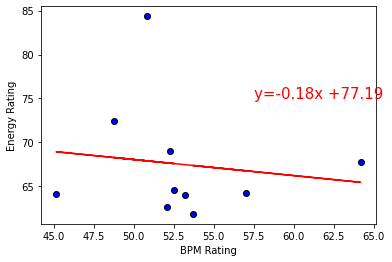

In [13]:
#Create Plot Graph
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(val,pop)
regress_values=val * slope + intercept
plt.xlabel("BPM Rating")
plt.ylabel("Energy Rating")
line_eq="y="+ str(round(slope,2)) + "x +" +str(round(intercept,2))
plt.scatter(val,pop, marker="o", facecolors="blue", edgecolors="black")
plt.plot(val,regress_values,"r-")
plt.annotate(line_eq,(57.5,75),fontsize=15,color="red")
print(f'The r-value is:{round(rvalue,3)}')
plt.show()

In [14]:
#Show slope solution to demonstrate correlation 
(slope,)

(-0.18272779271343897,)